In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import scanpy as sc
import scvelo as scv
from scvelo.core import sum
import celldancer.cdplt as cdplt

In [2]:
# read parameters
para = pd.read_csv("0_simulation_parameters/simulation_parameters.csv")
# para.index = para['parameters']
para 

parameters Mono-kinetic_1 Transcriptional_boost_1  \
0   kinetic_type           mono              tran_boost   
1      num_cells           2000                    2000   
2      num_genes           1000                    1000   
3       cellnum1           1000                    1000   
4    noise_level            0.2                     0.2   
5     alpha1_min            0.2                       1   
6     alpha1_max            1.2                       2   
7     alpha2_min              0                       3   
8     alpha2_max              0                       5   
9      beta1_min              1                       3   
10     beta1_max              3                       5   
11     beta2_min            NaN                     NaN   
12     beta2_max            NaN                     NaN   
13    gamma1_min            0.5                     0.5   
14    gamma1_max            1.5                     1.5   
15    gamma2_min            NaN                     NaN   
16    gamma2_max            NaN                     NaN   

   Multi-forward_branching_1 Mono-kinetic_2 Transcriptional_boost_2  \
0              multi_forward           mono              tran_boost   
1                       2000           2000                    2000   
2                       1000           1000                    1000   
3                       1000           1000                    1000   
4                        0.2            0.4                     0.4   
5                        0.5            0.2                       1   
6                        1.5            1.2                       2   
7                          3              0                       3   
8                          5              0                       5   
9                          6              1                       3   
10                         9              3                       5   
11                        10            NaN                     NaN   
12                        14            NaN                     NaN   
13                         1            0.5                     0.5   
14                         2            1.5                     1.5   
15                         3            NaN                     NaN   
16                         5            NaN                     NaN   

   Multi-forward_branching_2 Mono-kinetic_3 Transcriptional_boost_3  \
0              multi_forward           mono              tran_boost   
1                       2000           2000                    2000   
2                       1000           1000                    1000   
3                       1000           1000                    1000   
4                        0.4            0.6                     0.6   
5                        0.5            0.2                       1   
6                        1.5            1.2                       2   
7                          3              0                       3   
8                          5              0                       5   
9                          6              1                       3   
10                         9              3                       5   
11                        10            NaN                     NaN   
12                        14            NaN                     NaN   
13                         1            0.5                     0.5   
14                         2            1.5                     1.5   
15                         3            NaN                     NaN   
16                         5            NaN                     NaN   

   Multi-forward_branching_3  ... Multi-forward_branching_7 Mono-kinetic_8  \
0              multi_forward  ...             multi_forward           mono   
1                       2000  ...                      2000           2000   
2                       1000  ...                      1000           1000   
3                       1000  ...                      1000           100

## cal spliced and unspliced mRNA proportion

Mono-kinetic_1


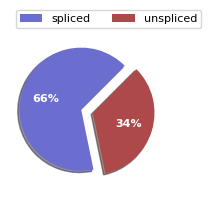

[0.6572295  0.34277052]
Transcriptional_boost_1


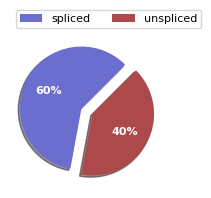

[0.595915   0.40408492]
Multi-forward_branching_1


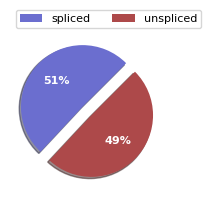

[0.5054905  0.49450952]
Mono-kinetic_2


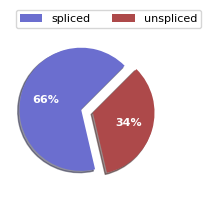

[0.6615353  0.33846462]
Transcriptional_boost_2


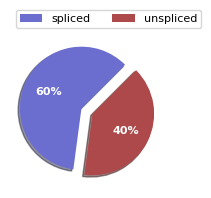

[0.6039052 0.3960948]
Multi-forward_branching_2


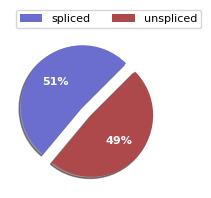

[0.51446086 0.48553914]
Mono-kinetic_3


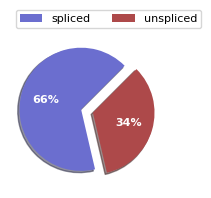

[0.66144055 0.3385594 ]
Transcriptional_boost_3


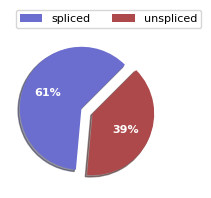

[0.6106718  0.38932824]
Multi-forward_branching_3


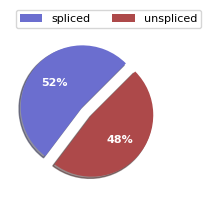

[0.52209514 0.47790486]
Mono-kinetic_4


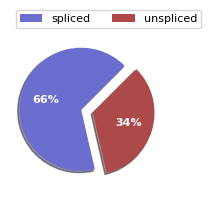

[0.6609168 0.3390832]
Transcriptional_boost_4


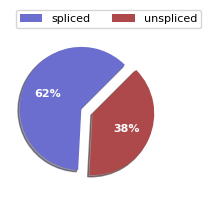

[0.6166869  0.38331312]
Multi-forward_branching_4


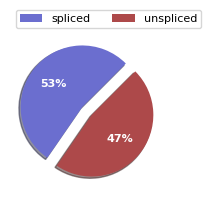

[0.5288864  0.47111365]
Mono-kinetic_5


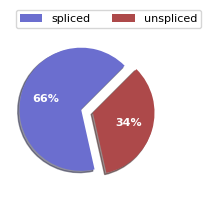

[0.66013265 0.33986738]
Transcriptional_boost_5


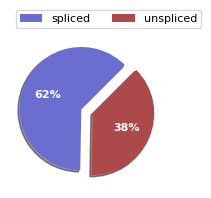

[0.6221571 0.3778429]
Multi-forward_branching_5


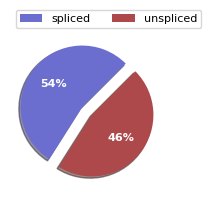

[0.5350471 0.4649529]
Mono-kinetic_6


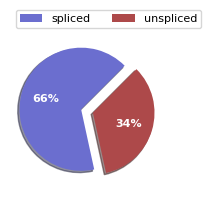

[0.65918434 0.34081563]
Transcriptional_boost_6


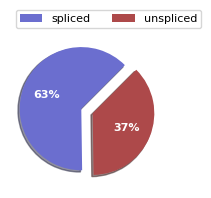

[0.62718236 0.37281758]
Multi-forward_branching_6


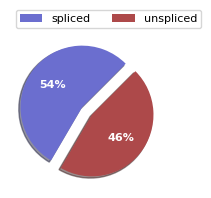

[0.5406961  0.45930392]
Mono-kinetic_7


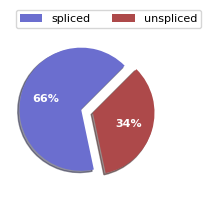

[0.65813357 0.34186646]
Transcriptional_boost_7


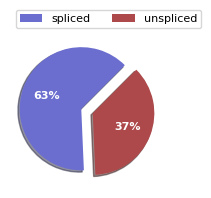

[0.6318196  0.36818042]
Multi-forward_branching_7


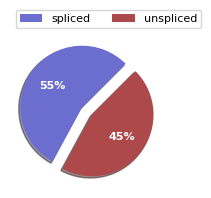

[0.5459032  0.45409676]
Mono-kinetic_8


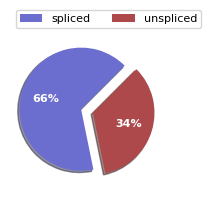

[0.657023 0.342977]
Transcriptional_boost_8


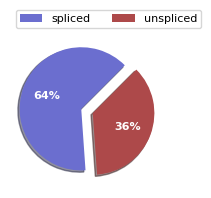

[0.6361045  0.36389545]
Multi-forward_branching_8


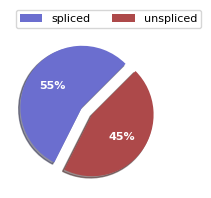

[0.5507217  0.44927832]
Mono-kinetic_9


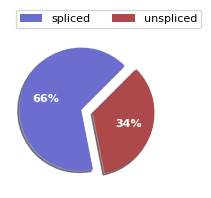

[0.655882   0.34411794]
Transcriptional_boost_9


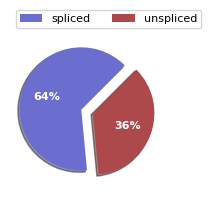

[0.6400696  0.35993046]
Multi-forward_branching_9


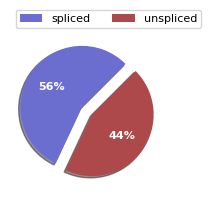

[0.55518764 0.44481245]
Mono-kinetic_10


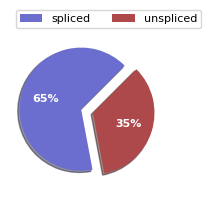

[0.65473205 0.34526792]
Transcriptional_boost_10


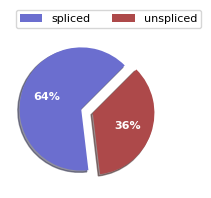

[0.6437455  0.35625452]
Multi-forward_branching_10


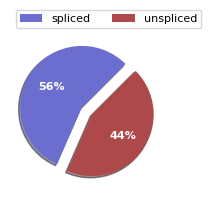

[0.5593454 0.4406546]


In [3]:
proportion = []
for i in para.columns[1:]:
    print(i)
    adata = sc.read_h5ad('1_simulation_datasets/' + i + ".h5ad")
    # print(adata)

    scv.pl.proportions(adata)
    
    # the function from scv.pl.proportions
    layers=None
    use_raw=True


    # get counts per cell for each layer
    if layers is None:
        layers = ["spliced", "unspliced", "ambigious"]
    layers_keys = [key for key in layers if key in adata.layers.keys()]
    counts_layers = [sum(adata.layers[key], axis=1) for key in layers_keys]

    if use_raw:
        ikey, obs = "initial_size_", adata.obs
        counts_layers = [
            obs[ikey + layer_key] if ikey + layer_key in obs.keys() else c
            for layer_key, c in zip(layers_keys, counts_layers)
        ]
    counts_total = np.sum(counts_layers, 0)
    counts_total += counts_total == 0
    counts_layers = np.array([counts / counts_total for counts in counts_layers])

    # print(counts_layers)
    # print(counts_total)
    print(np.mean(counts_layers, axis=1))
    proportion.append(np.mean(counts_layers, axis=1))


In [4]:
df = pd.DataFrame(proportion)
df.columns = ['spliced','unspliced']
df['parameters'] = para.columns[1:]

para2 = para.T
para2.columns = para2.iloc[0]
para2 = para2.drop(para2.index[0])
para2['parameters'] = para2.index

df2 = pd.merge(para2,df,on="parameters")
df2.to_csv('0_simulation_parameters/parameters_with_proportion.csv')

## plot simulation gene example

Mono-kinetic_1
Transcriptional_boost_1
Multi-forward_branching_1
Mono-kinetic_2
Transcriptional_boost_2
Multi-forward_branching_2
Mono-kinetic_3
Transcriptional_boost_3
Multi-forward_branching_3
Mono-kinetic_4
Transcriptional_boost_4
Multi-forward_branching_4
Mono-kinetic_5
Transcriptional_boost_5
Multi-forward_branching_5
Mono-kinetic_6
Transcriptional_boost_6
Multi-forward_branching_6
Mono-kinetic_7
Transcriptional_boost_7
Multi-forward_branching_7
Mono-kinetic_8
Transcriptional_boost_8
Multi-forward_branching_8
Mono-kinetic_9
Transcriptional_boost_9
Multi-forward_branching_9
Mono-kinetic_10
Transcriptional_boost_10
Multi-forward_branching_10


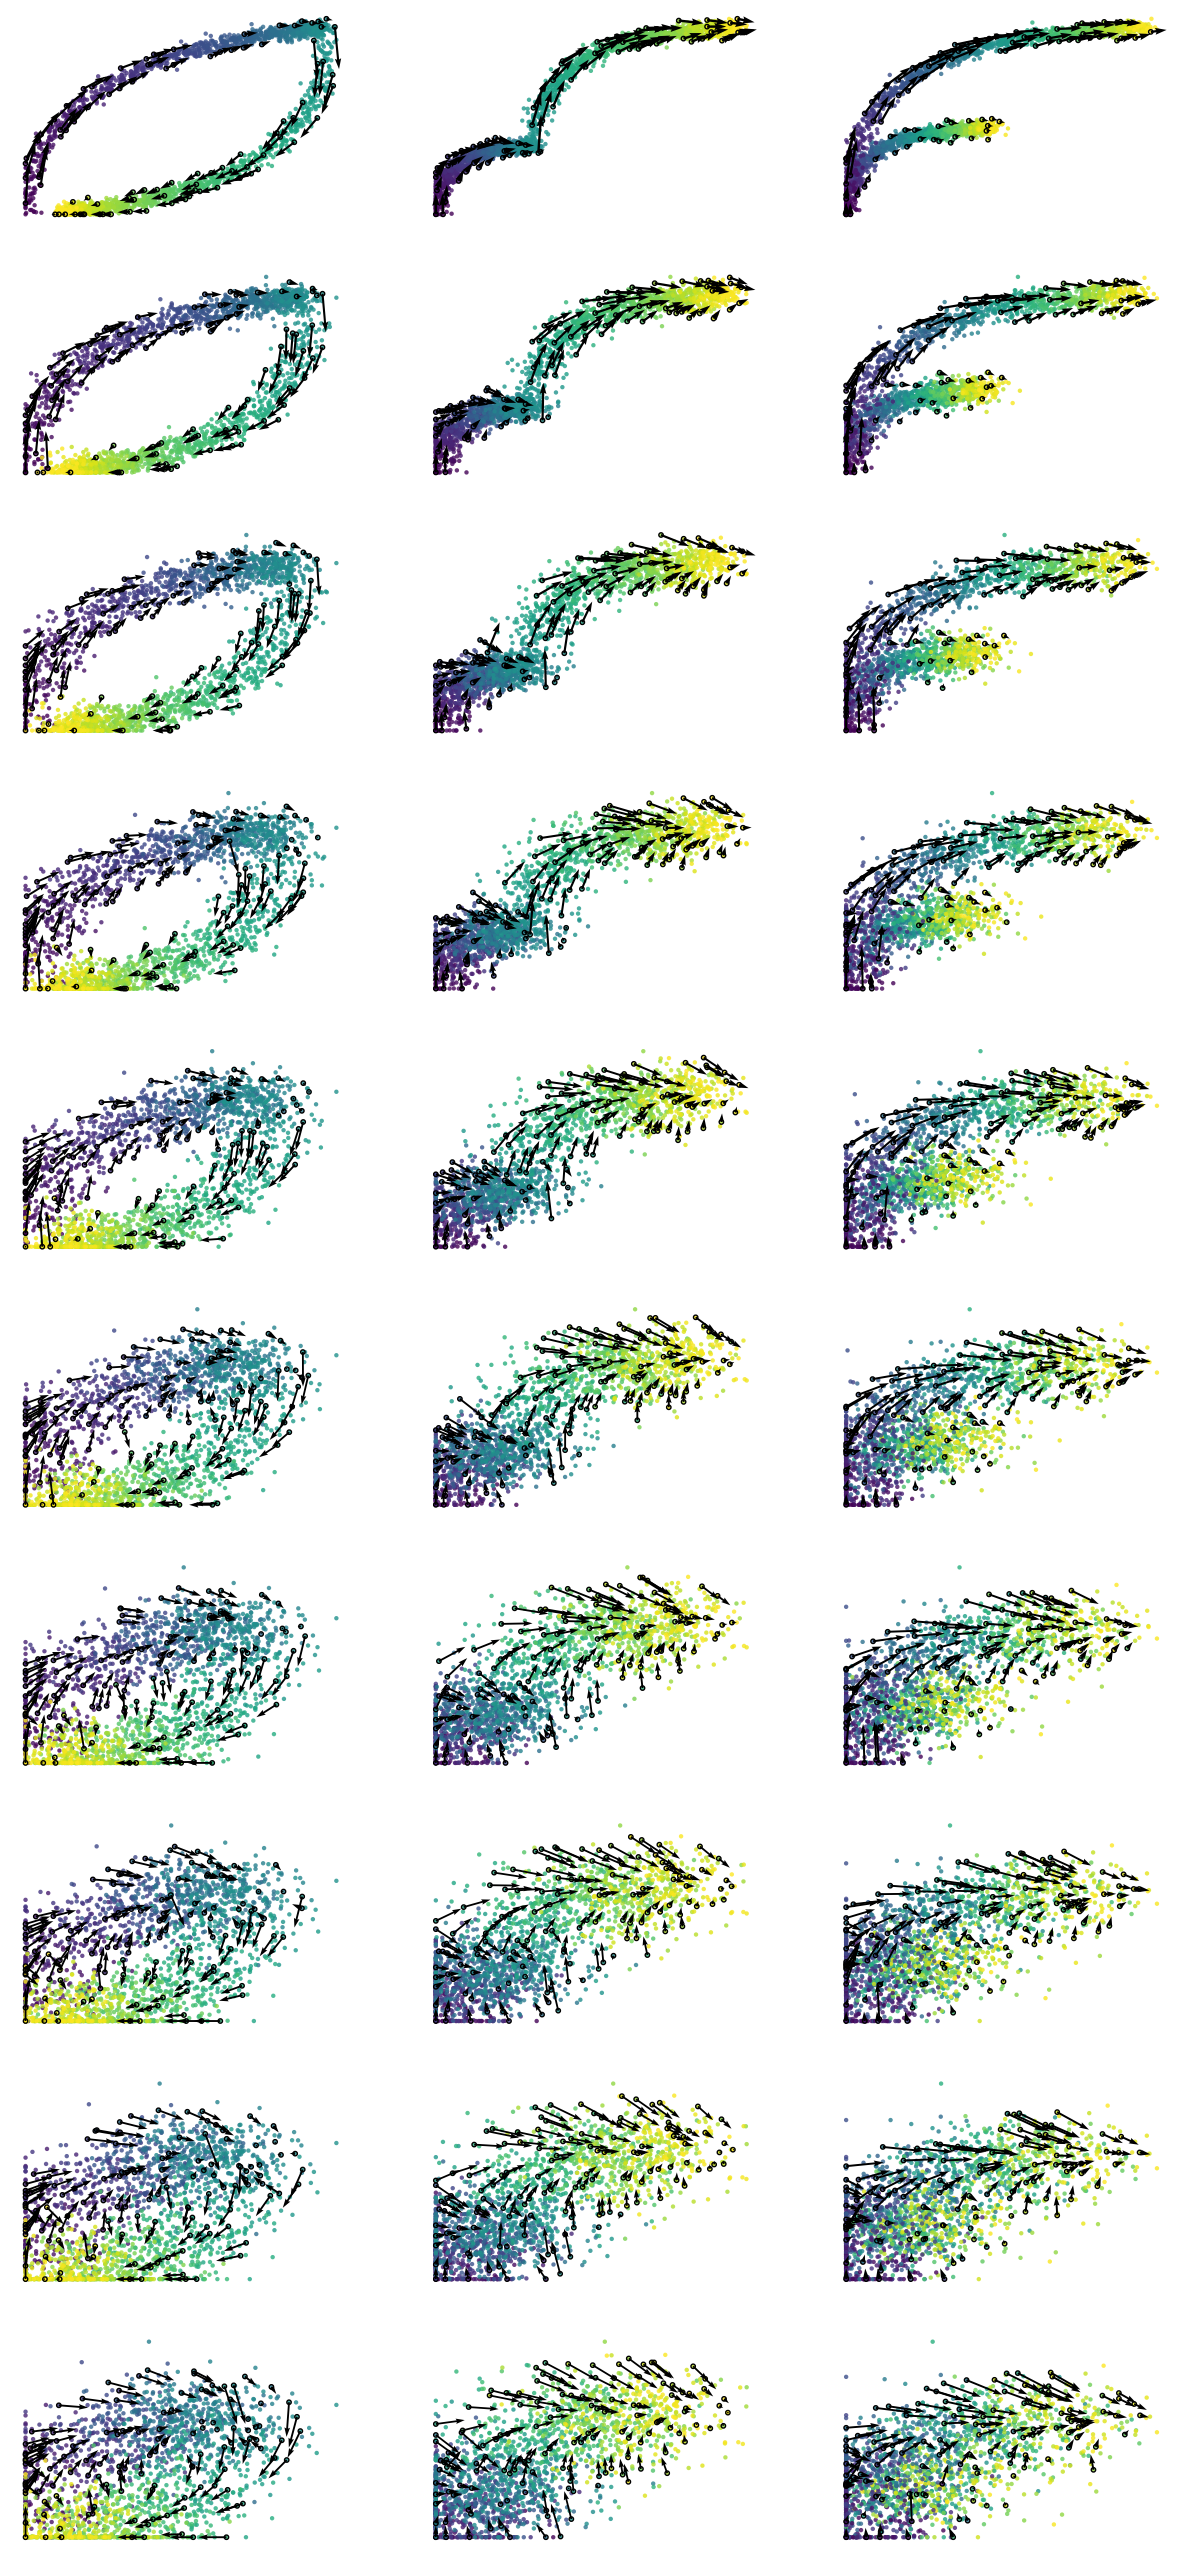

In [5]:
fig = plt.figure(figsize=(15,100))
f = 1
gene_name=['simulation000']

for i in para.columns[1:]:
    print(i)

    cellDancer_df = pd.read_csv('1_simulation_datasets/' + i + '.csv')
    cellDancer_df['splice_predict'] = cellDancer_df['splice'] + cellDancer_df['ground_truth_velocity']
    cellDancer_df['unsplice_predict'] = cellDancer_df['unsplice'] + cellDancer_df['ground_truth_unspliced_velocity']
    
    gene = cellDancer_df[cellDancer_df['gene_name'].isin(gene_name)]
    
    ii = i.split('_')[0]
    if ii in ['Mono-kinetic','Transcriptional']:
        gene['cell_index'] = range(0,2000)
    else:
        gene['cell_index'] = list(range(0, 1000)) * 2


    ax = fig.add_subplot(30, 3, f)
    cdplt.scatter_gene(
            ax=ax,
            x='splice',
            y='unsplice',
            colors='cell_index',
            cellDancer_df = gene,
            custom_xlim=None,
            custom_ylim=None,
            alpha=0.8, 
            s = 10,
            velocity=True,
            gene='simulation000')
    ax.axis('off')

    f = f+1

plt.savefig('/media/liyaru/LYR/Benchmark/Fig/9.cd_simu_gene.pdf',bbox_inches='tight')
plt.savefig('/media/liyaru/LYR/Benchmark/Fig/9.cd_simu_gene.png',bbox_inches='tight',format='png',dpi=300)
plt.show()

## pca

Mono-kinetic_1
Transcriptional_boost_1
Multi-forward_branching_1
Mono-kinetic_2
Transcriptional_boost_2
Multi-forward_branching_2
Mono-kinetic_3
Transcriptional_boost_3
Multi-forward_branching_3
Mono-kinetic_4
Transcriptional_boost_4
Multi-forward_branching_4
Mono-kinetic_5
Transcriptional_boost_5
Multi-forward_branching_5
Mono-kinetic_6
Transcriptional_boost_6
Multi-forward_branching_6
Mono-kinetic_7
Transcriptional_boost_7
Multi-forward_branching_7
Mono-kinetic_8
Transcriptional_boost_8
Multi-forward_branching_8
Mono-kinetic_9
Transcriptional_boost_9
Multi-forward_branching_9
Mono-kinetic_10
Transcriptional_boost_10
Multi-forward_branching_10


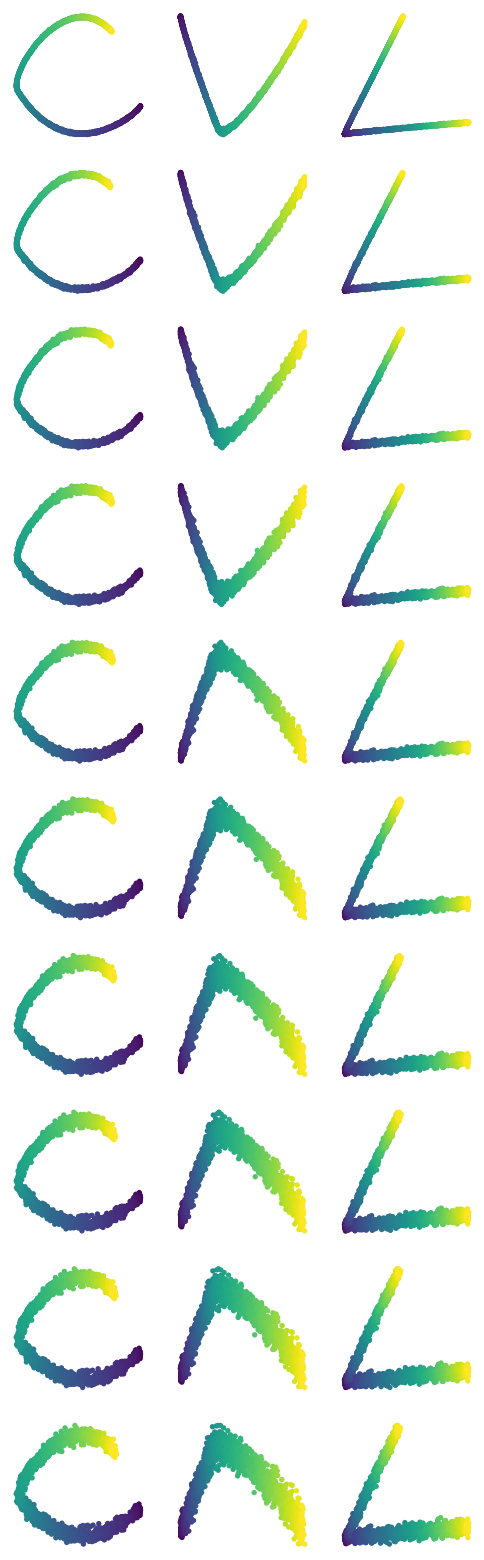

In [6]:
nrow = 10
ncol = 3
fig, axs = plt.subplots(nrow, ncol, figsize=(2 * ncol, 2 * nrow))
f = 0

for i in para.columns[1:]:
    print(i)
    adata = sc.read_h5ad('1_simulation_datasets/' + i + ".h5ad")
    
    ii = i.split('_')[0]
    if ii in ['Mono-kinetic','Transcriptional']:
        adata.obs['cell_index'] = range(0,2000)
    else:
        adata.obs['cell_index'] = list(range(0, 1000)) * 2


    r = int(f/3)
    c = f % 3
    ax = axs[r, c]
    
    fig_i = sc.pl.pca(adata,ax=ax, show=False,
                      legend_loc=False,frameon=False,
                      colorbar_loc=None,
                      color = 'cell_index')
    
    ax.axis('off')
    ax.set_title('') 
    ax.tick_params(
                top="off",
                bottom="off",
                left="off",
                right="off",
                labelleft="off",
                labelbottom="off",
            )

    f = f+1
    

plt.savefig('/media/liyaru/LYR/Benchmark/Fig/9.cd_simu_pca.pdf',bbox_inches='tight')
plt.savefig('/media/liyaru/LYR/Benchmark/Fig/9.cd_simu_pca.png',bbox_inches='tight',format='png',dpi=300)

plt.show()

## velocity stream

Mono-kinetic_1
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Transcriptional_boost_1
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Multi-forward_branching_1
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Mono-kinetic_2
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Transcriptional_boost_2
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Multi-forward_branching_2
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Mono-kinetic_3
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Transcriptional_boost_3
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Multi-forward_branching_3
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Mono-kinetic_4
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Transcriptional_boost_4
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Multi-forward_branching_4
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Mono-kinetic_5
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Transcriptional_boost_5
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Multi-forward_branching_5
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Mono-kinetic_6
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Transcriptional_boost_6
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Multi-forward_branching_6
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Mono-kinetic_7
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Transcriptional_boost_7
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Multi-forward_branching_7
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Mono-kinetic_8
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Transcriptional_boost_8
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Multi-forward_branching_8
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Mono-kinetic_9
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Transcriptional_boost_9
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Multi-forward_branching_9
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Mono-kinetic_10
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Transcriptional_boost_10
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)
Multi-forward_branching_10
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'ground_truth_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'ground_truth_velocity_pca', embedded velocity vectors (adata.obsm)


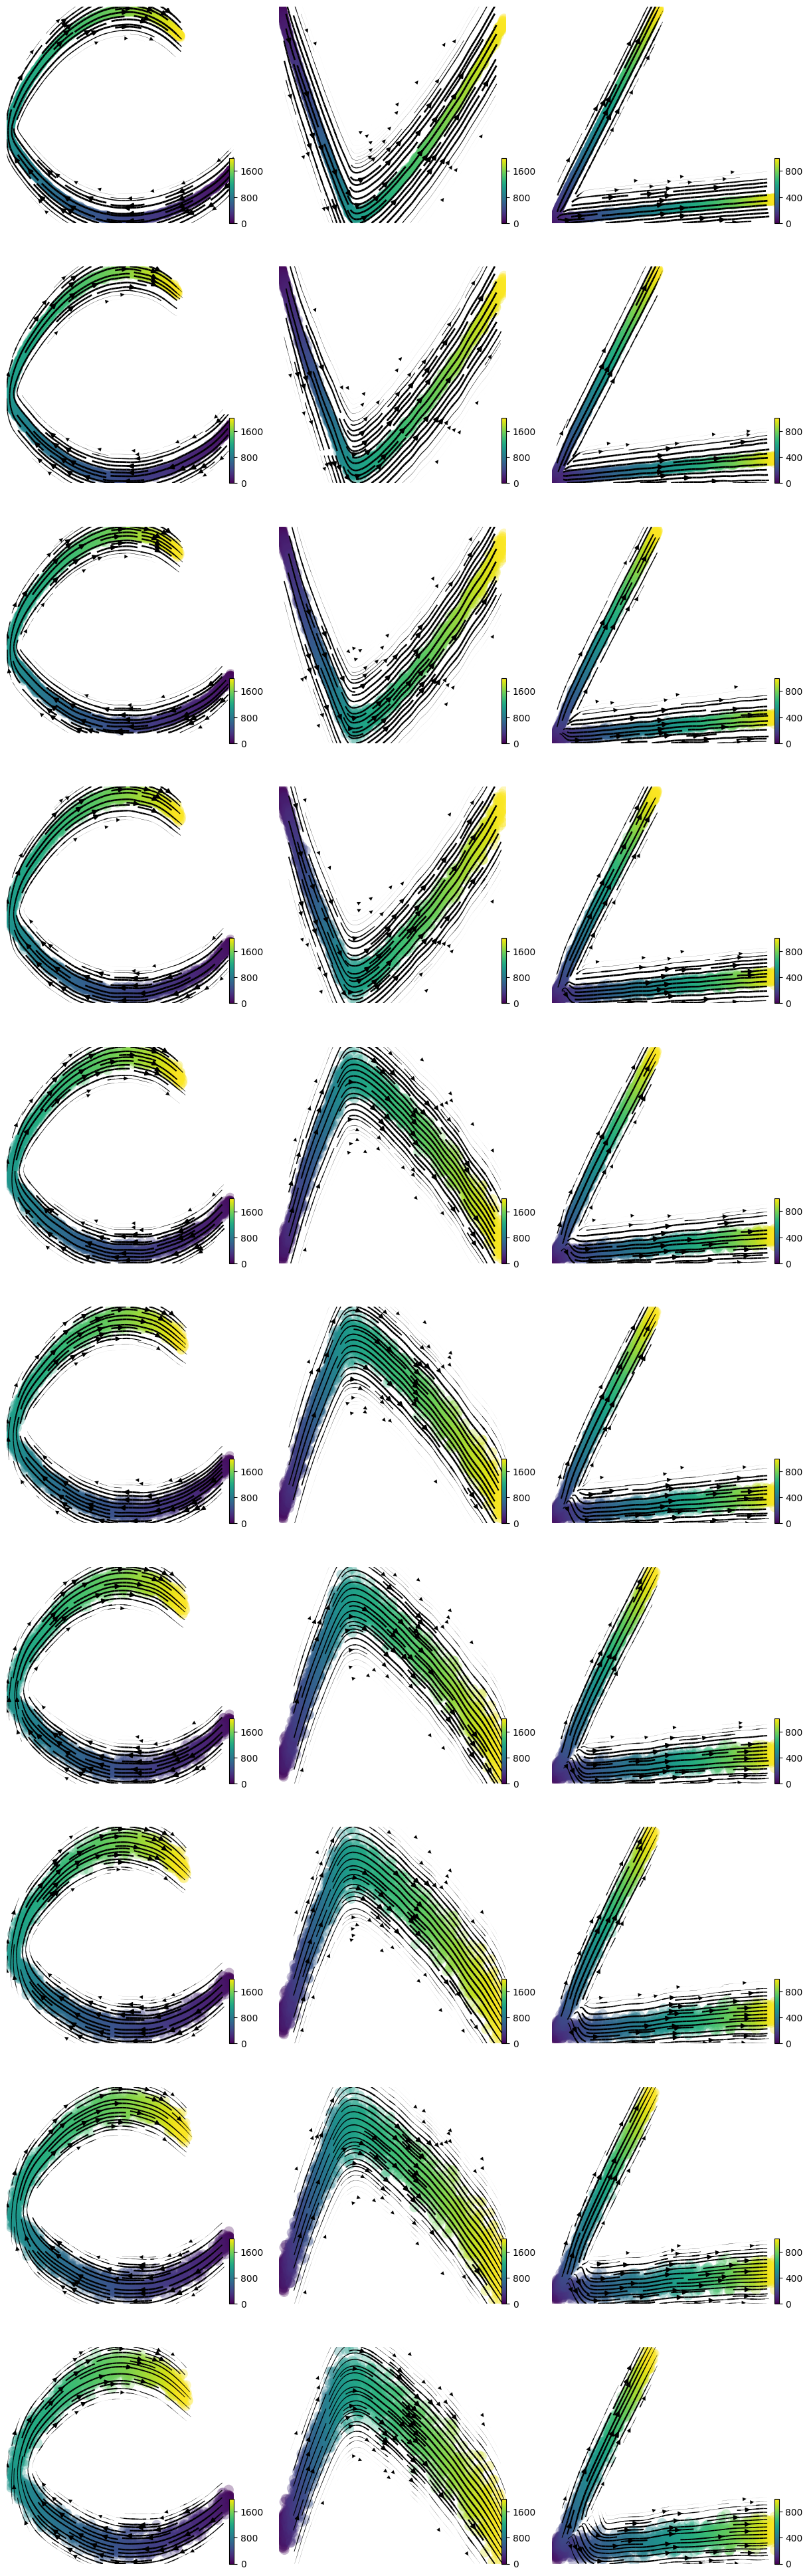

In [7]:
nrow = 10
ncol = 3
fig, axs = plt.subplots(nrow, ncol, figsize=(5 * ncol, 5 * nrow))
f = 0

for i in para.columns[1:]:
    print(i)
    adata = sc.read_h5ad('1_simulation_datasets/' + i + ".h5ad")
    
    ii = i.split('_')[0]
    if ii in ['Mono-kinetic','Transcriptional']:
        adata.obs['cell_index'] = range(0,2000)
    else:
        adata.obs['cell_index'] = list(range(0, 1000)) * 2

    r = int(f/3)
    c = f % 3
    ax = axs[r, c]

    scv.tl.velocity_graph(adata,vkey='ground_truth_velocity',basis='pca',n_jobs=10)
    
    fig_i = scv.pl.velocity_embedding_stream(adata,ax=ax, show=False,
                      legend_loc='none',
                      frameon=False,
                      color = 'cell_index',
                      vkey='ground_truth_velocity',basis='pca')


    ax.axis('off')
    ax.set_title('')

    ax.tick_params(
                top="off",
                bottom="off",
                left="off",
                right="off",
                labelleft="off",
                labelbottom="off",
            )

    f = f+1

plt.savefig('/media/liyaru/LYR/Benchmark/Fig/9.cd_simu_pca_stream.svg',bbox_inches='tight',format='svg')
plt.savefig('/media/liyaru/LYR/Benchmark/Fig/9.cd_simu_pca_stream.png',bbox_inches='tight',format='png',dpi=200)
plt.show()

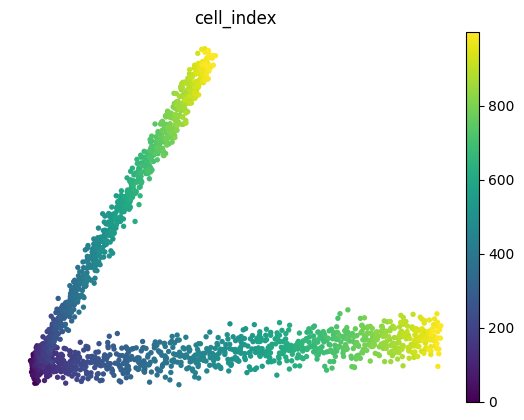

In [8]:
sc.pl.pca(adata,legend_loc=False,frameon=False,color = 'cell_index',
          save='9.cd_simu_pca_legend.pdf'
          )